<a href="https://colab.research.google.com/github/zahra-teb/graph_ml_course_assignments/blob/main/assignment_6/assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 2.0.1+cu118


In [2]:
!python -V

Python 3.10.12


In [3]:
from pathlib import Path

string = torch.__version__
str_path = "https://pytorch-geometric.com/whl/torch-"+string[:string.index("+")]+"%2B"+string[string.index("+"):].replace("+","")+".html"
path = Path(str_path)


In [4]:
# Install torch geometric
try:
    from torch_geometric.datasets import KarateClub
    print("PyG is already installed!")
except:
    print("PyG is installing!")
    !pip install -q torch_scatter -f https://data.pyg.org/whl/torch-2.0.1%2Bcu118/torch_scatter-2.1.1%2Bpt20cu118-cp39-cp39-linux_x86_64.whl
    !pip install -q torch_sparse -f https://data.pyg.org/whl/torch-2.0.1%2Bcu118/torch_sparse-0.6.17%2Bpt20cu118-cp39-cp39-linux_x86_64.whl
    !pip install -q torch_cluster -f https://data.pyg.org/whl/torch-2.0.1%2Bcu118/torch_cluster-1.6.1%2Bpt20cu118-cp39-cp39-linux_x86_64.whl
    !pip install -q torch-geometric

PyG is installing!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 15.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
from torch_geometric.nn import Node2Vec
import os.path as osp
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.datasets import Planetoid
from tqdm.notebook import tqdm

In [6]:
dataset = 'CiteSeer'
path = osp.join('.', 'data', dataset)
dataset = Planetoid(path, dataset)
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...


Dataset: CiteSeer():
Number of graphs: 1
Number of features: 3703
Number of classes: 6


Done!


In [7]:
data = dataset[0]
# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Number of training nodes: 120
Training node label rate: 0.04
Contains isolated nodes: True
Contains self-loops: False
Is undirected: True


In [8]:
data.edge_index

tensor([[   0,    1,    1,  ..., 3324, 3325, 3326],
        [ 628,  158,  486,  ..., 2820, 1643,   33]])

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [10]:
model_1 = Node2Vec(data.edge_index, embedding_dim=10,
                 walk_length=5,
                 context_size=5, walks_per_node=1,
                 num_negative_samples=1,
                 p=200, q=1
                 ).to(device)

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
loader_1 = model_1.loader(batch_size=128, shuffle=True, num_workers=4)

In [13]:
idx, (pos_rw, neg_rw) = next(enumerate(loader_1))

In [14]:
idx

0

In [15]:
(pos_rw.shape, neg_rw.shape)

(torch.Size([128, 5]), torch.Size([128, 5]))

In [16]:
pos_rw

tensor([[1210,  484, 1531,  300, 2815],
        [3031, 1962, 1371, 1962, 1371],
        [2570, 2831, 2570,   57, 2570],
        [2345, 1729,  505, 1729, 2345],
        [3025, 2581,  336, 2581, 2580],
        [2366, 2790, 1726, 1411, 2366],
        [1403, 1978, 1403, 1978, 1403],
        [ 231,  875, 1257, 2797, 1918],
        [1571, 3119, 1252, 3117, 3118],
        [2202, 1808,  410, 1808,  473],
        [1745,   37, 1745,   37, 1745],
        [2107, 2398,  307, 1918,  307],
        [ 403, 3185,  403, 3185, 1662],
        [1264,  565, 2484,  565,  904],
        [  44, 1227,   24, 2027, 2781],
        [1747, 2121, 2390, 2121, 1747],
        [ 356,  230, 2979,  230, 1968],
        [1249, 2280, 1249, 2280, 1249],
        [ 874, 2866, 1634, 2866,  609],
        [3253, 1596, 1045, 3252,  283],
        [3289,  344, 3289,  344, 3289],
        [3103, 3267, 3103, 3267, 3103],
        [ 907, 1706, 2270, 1706, 2270],
        [2146, 2500, 2146, 2500, 2146],
        [2140,  743, 2140,   22, 3251],


In [17]:
neg_rw

tensor([[1210, 1966, 2399, 2054, 2675],
        [3031, 2798, 2597,  116, 2778],
        [2570, 1788,  717,  785, 2465],
        [2345, 1422, 1484, 3169,  330],
        [3025,   53, 2024, 2349, 2683],
        [2366, 1325, 1667, 1992, 2470],
        [1403, 1984, 3294, 1019, 2037],
        [ 231,  297, 2317, 2549,  219],
        [1571, 2146, 1614,  147,  315],
        [2202, 3068, 2297,  294, 2847],
        [1745, 2390,  433, 1458, 2185],
        [2107, 1133,  757, 1573, 2841],
        [ 403,  861,  570,  833,  714],
        [1264, 2121,  552, 2561,  533],
        [  44, 1711, 1474,  863, 1789],
        [1747,  857, 1098, 1482, 3214],
        [ 356, 1045, 1322, 2403, 1272],
        [1249,  498,  627,  881, 2039],
        [ 874,  504,  823,  317, 2612],
        [3253, 2259,  121, 1855, 1504],
        [3289, 2452,  333, 2505, 1220],
        [3103, 1890, 2111, 1317, 1162],
        [ 907,  698, 1783, 2805, 3185],
        [2146, 2528, 2139, 2857, 2137],
        [2140, 2655, 1766, 2041, 1379],


In [18]:
import networkx as nx
edge_tuples = [tuple(x) for x in data.edge_index.numpy().transpose()]
G = nx.from_edgelist(edge_tuples)
pos = nx.spring_layout(G, center=[0.5, 0.5])
nx.set_node_attributes(G, pos, 'pos')

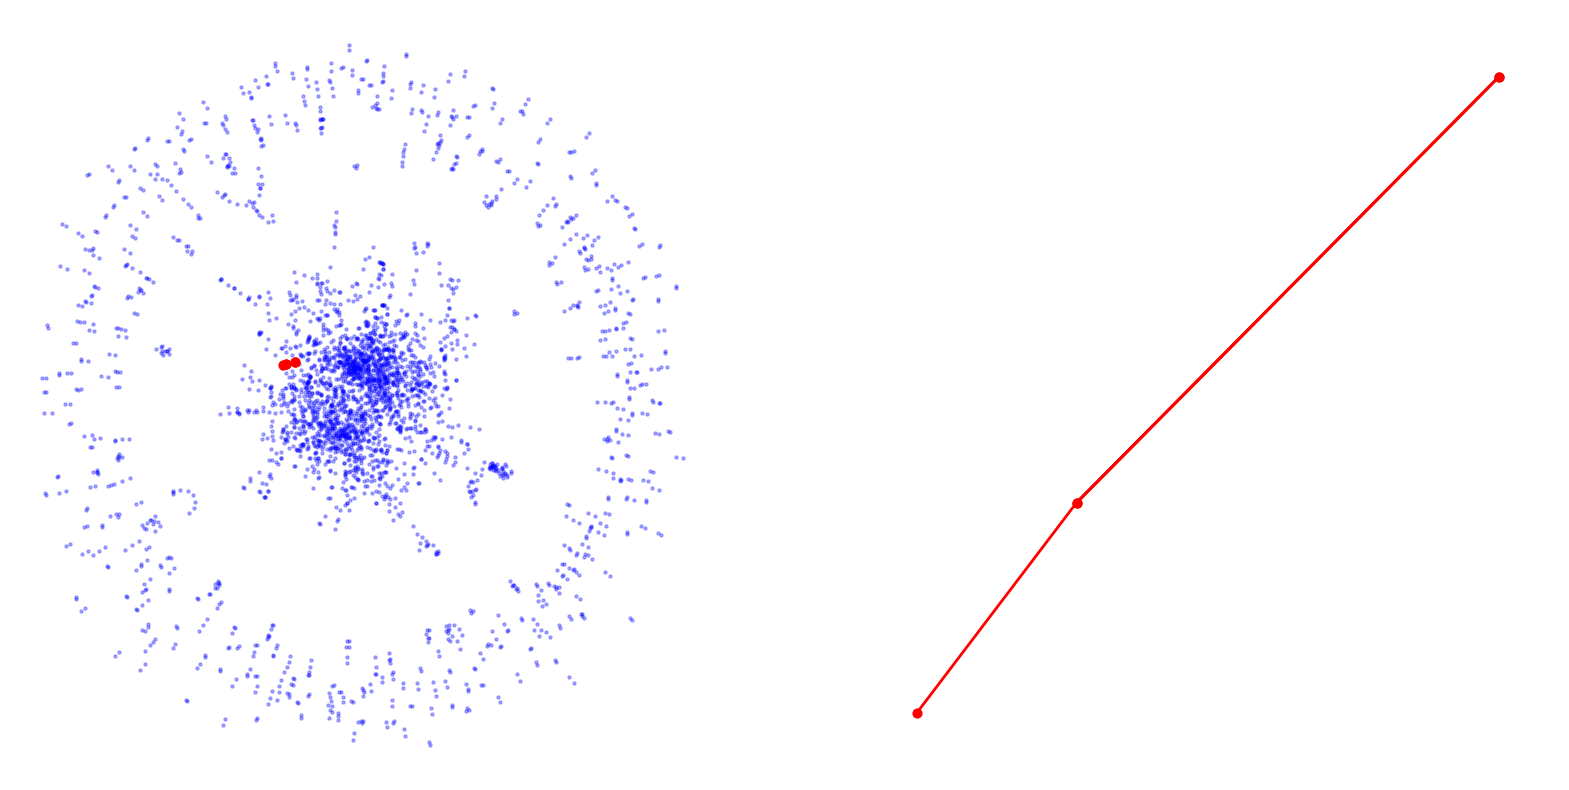

In [19]:
nodelist = next(enumerate(loader_1))[1][0][0].tolist()
walk = nx.path_graph(len(nodelist))
nx.set_node_attributes(walk, {idx: pos[node_id] for idx, node_id in enumerate(nodelist)}, 'pos')

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
nx.draw_networkx_nodes(G,
                       ax=ax,
                       pos=nx.get_node_attributes(G, 'pos'),
                       node_size=5,
                       alpha=0.3,
                       node_color='b')
nx.draw(walk,
        node_size=40,
        node_color='r',
        ax=ax,
        pos=nx.get_node_attributes(walk, 'pos'),
        width=2,
        edge_color='r')
ax = fig.add_subplot(1, 2, 2)
nx.draw(walk,
        node_size=40,
        node_color='r',
        ax=ax,
        pos=nx.get_node_attributes(walk, 'pos'),
        width=2,
        edge_color='r')

In [20]:
optimizer = torch.optim.Adam(list(model_1.parameters()), lr=0.01)

In [21]:
def train(model, loader):
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in tqdm(loader):
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

In [22]:
@torch.no_grad()
def test(model):
    model.eval()
    z = model()
    acc = model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask],
                     max_iter=150)
    return acc

In [23]:
data

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])

In [24]:
data.y.unique()

tensor([0, 1, 2, 3, 4, 5])

In [25]:
for epoch in range(1, 201):
    loss = train(model_1, loader_1)
    acc = test(model_1)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 01, Loss: 2.5154, Acc: 0.1560


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 02, Loss: 2.3356, Acc: 0.1550


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 03, Loss: 2.1436, Acc: 0.1500


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 04, Loss: 2.0466, Acc: 0.1540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 05, Loss: 1.9336, Acc: 0.1570


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 06, Loss: 1.8226, Acc: 0.1540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 07, Loss: 1.7420, Acc: 0.1550


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.6365, Acc: 0.1520


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.5911, Acc: 0.1540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.5373, Acc: 0.1560


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.5106, Acc: 0.1640


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 12, Loss: 1.4139, Acc: 0.1730


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 13, Loss: 1.3928, Acc: 0.1760


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 14, Loss: 1.3699, Acc: 0.1720


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 15, Loss: 1.3167, Acc: 0.1800


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 16, Loss: 1.3036, Acc: 0.1840


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 17, Loss: 1.2722, Acc: 0.1810


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 18, Loss: 1.2621, Acc: 0.1830


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 19, Loss: 1.2251, Acc: 0.1910


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 20, Loss: 1.2087, Acc: 0.1960


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 21, Loss: 1.1813, Acc: 0.1940


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 22, Loss: 1.1778, Acc: 0.1850


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 23, Loss: 1.1559, Acc: 0.1880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 24, Loss: 1.1314, Acc: 0.1930


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 25, Loss: 1.1056, Acc: 0.1890


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 26, Loss: 1.0878, Acc: 0.1840


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 27, Loss: 1.0899, Acc: 0.1890


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 28, Loss: 1.0975, Acc: 0.1960


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 29, Loss: 1.0701, Acc: 0.2010


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 30, Loss: 1.0604, Acc: 0.2000


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 31, Loss: 1.0517, Acc: 0.2080


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 32, Loss: 1.0414, Acc: 0.2050


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 33, Loss: 1.0316, Acc: 0.2150


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 34, Loss: 1.0338, Acc: 0.2250


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 35, Loss: 1.0216, Acc: 0.2240


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 36, Loss: 1.0205, Acc: 0.2280


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.9858, Acc: 0.2280


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.9883, Acc: 0.2370


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.9887, Acc: 0.2370


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.9837, Acc: 0.2340


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.9650, Acc: 0.2410


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.9622, Acc: 0.2490


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.9716, Acc: 0.2460


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.9598, Acc: 0.2360


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.9587, Acc: 0.2450


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.9417, Acc: 0.2520


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.9560, Acc: 0.2570


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.9509, Acc: 0.2640


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.9388, Acc: 0.2690


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 50, Loss: 0.9439, Acc: 0.2650


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 51, Loss: 0.9302, Acc: 0.2760


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 52, Loss: 0.9314, Acc: 0.2780


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 53, Loss: 0.9276, Acc: 0.2840


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 54, Loss: 0.9163, Acc: 0.2860


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 55, Loss: 0.9194, Acc: 0.2850


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 56, Loss: 0.9207, Acc: 0.2920


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 57, Loss: 0.9190, Acc: 0.2870


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 58, Loss: 0.9077, Acc: 0.2930


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 59, Loss: 0.9067, Acc: 0.2990


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 60, Loss: 0.9125, Acc: 0.2980


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 61, Loss: 0.9066, Acc: 0.2990


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 62, Loss: 0.9172, Acc: 0.2980


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 63, Loss: 0.9078, Acc: 0.2950


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 64, Loss: 0.9023, Acc: 0.3050


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 65, Loss: 0.8967, Acc: 0.2960


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 66, Loss: 0.8943, Acc: 0.3010


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 67, Loss: 0.9006, Acc: 0.3050


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 68, Loss: 0.9061, Acc: 0.3090


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 69, Loss: 0.8914, Acc: 0.3050


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 70, Loss: 0.8919, Acc: 0.3130


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 71, Loss: 0.8920, Acc: 0.3140


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 72, Loss: 0.8924, Acc: 0.3220


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 73, Loss: 0.8789, Acc: 0.3240


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 74, Loss: 0.8913, Acc: 0.3260


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 75, Loss: 0.8874, Acc: 0.3230


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 76, Loss: 0.8935, Acc: 0.3260


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 77, Loss: 0.8855, Acc: 0.3230


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 78, Loss: 0.8884, Acc: 0.3200


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 79, Loss: 0.8905, Acc: 0.3140


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 80, Loss: 0.8860, Acc: 0.3200


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 81, Loss: 0.8929, Acc: 0.3200


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 82, Loss: 0.8831, Acc: 0.3130


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 83, Loss: 0.8908, Acc: 0.3280


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 84, Loss: 0.8907, Acc: 0.3280


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 85, Loss: 0.8905, Acc: 0.3300


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 86, Loss: 0.8782, Acc: 0.3320


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 87, Loss: 0.8840, Acc: 0.3340


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 88, Loss: 0.8863, Acc: 0.3380


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 89, Loss: 0.8787, Acc: 0.3430


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 90, Loss: 0.8854, Acc: 0.3530


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 91, Loss: 0.8870, Acc: 0.3450


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 92, Loss: 0.8862, Acc: 0.3380


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 93, Loss: 0.8746, Acc: 0.3480


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 94, Loss: 0.8778, Acc: 0.3480


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 95, Loss: 0.8773, Acc: 0.3480


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 96, Loss: 0.8770, Acc: 0.3520


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 97, Loss: 0.8785, Acc: 0.3530


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 98, Loss: 0.8765, Acc: 0.3550


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 99, Loss: 0.8787, Acc: 0.3540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 100, Loss: 0.8666, Acc: 0.3630


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 101, Loss: 0.8843, Acc: 0.3640


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 102, Loss: 0.8794, Acc: 0.3630


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 103, Loss: 0.8793, Acc: 0.3570


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 104, Loss: 0.8723, Acc: 0.3600


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 105, Loss: 0.8854, Acc: 0.3580


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 106, Loss: 0.8722, Acc: 0.3560


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 107, Loss: 0.8784, Acc: 0.3600


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 108, Loss: 0.8787, Acc: 0.3670


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 109, Loss: 0.8755, Acc: 0.3680


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 110, Loss: 0.8753, Acc: 0.3730


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 111, Loss: 0.8765, Acc: 0.3780


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 112, Loss: 0.8782, Acc: 0.3670


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 113, Loss: 0.8765, Acc: 0.3720


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 114, Loss: 0.8738, Acc: 0.3810


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 115, Loss: 0.8818, Acc: 0.3740


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 116, Loss: 0.8788, Acc: 0.3770


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 117, Loss: 0.8770, Acc: 0.3750


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 118, Loss: 0.8777, Acc: 0.3670


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 119, Loss: 0.8817, Acc: 0.3740


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 120, Loss: 0.8715, Acc: 0.3750


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 121, Loss: 0.8744, Acc: 0.3710


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 122, Loss: 0.8762, Acc: 0.3660


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 123, Loss: 0.8689, Acc: 0.3660


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 124, Loss: 0.8725, Acc: 0.3660


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 125, Loss: 0.8813, Acc: 0.3640


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 126, Loss: 0.8784, Acc: 0.3720


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 127, Loss: 0.8676, Acc: 0.3590


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 128, Loss: 0.8690, Acc: 0.3650


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 129, Loss: 0.8728, Acc: 0.3740


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 130, Loss: 0.8678, Acc: 0.3820


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 131, Loss: 0.8720, Acc: 0.3810


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 132, Loss: 0.8767, Acc: 0.3810


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 133, Loss: 0.8681, Acc: 0.3850


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 134, Loss: 0.8721, Acc: 0.3810


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 135, Loss: 0.8692, Acc: 0.3750


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 136, Loss: 0.8736, Acc: 0.3890


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 137, Loss: 0.8727, Acc: 0.3850


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 138, Loss: 0.8781, Acc: 0.3800


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 139, Loss: 0.8712, Acc: 0.3880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 140, Loss: 0.8742, Acc: 0.3900


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 141, Loss: 0.8680, Acc: 0.4040


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 142, Loss: 0.8693, Acc: 0.4100


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 143, Loss: 0.8660, Acc: 0.4030


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 144, Loss: 0.8770, Acc: 0.3980


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 145, Loss: 0.8780, Acc: 0.3960


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 146, Loss: 0.8691, Acc: 0.3920


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 147, Loss: 0.8797, Acc: 0.3940


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 148, Loss: 0.8721, Acc: 0.4020


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 149, Loss: 0.8721, Acc: 0.3980


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 150, Loss: 0.8759, Acc: 0.3990


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 151, Loss: 0.8694, Acc: 0.3980


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 152, Loss: 0.8722, Acc: 0.4120


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 153, Loss: 0.8682, Acc: 0.4210


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 154, Loss: 0.8705, Acc: 0.4100


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 155, Loss: 0.8707, Acc: 0.4050


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 156, Loss: 0.8722, Acc: 0.4060


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 157, Loss: 0.8748, Acc: 0.4080


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 158, Loss: 0.8767, Acc: 0.4070


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 159, Loss: 0.8780, Acc: 0.4050


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 160, Loss: 0.8631, Acc: 0.4120


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 161, Loss: 0.8671, Acc: 0.3990


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 162, Loss: 0.8692, Acc: 0.3930


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 163, Loss: 0.8761, Acc: 0.3900


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 164, Loss: 0.8785, Acc: 0.3980


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 165, Loss: 0.8712, Acc: 0.3960


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 166, Loss: 0.8664, Acc: 0.3960


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 167, Loss: 0.8739, Acc: 0.4000


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 168, Loss: 0.8728, Acc: 0.4080


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 169, Loss: 0.8704, Acc: 0.4130


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 170, Loss: 0.8676, Acc: 0.4110


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 171, Loss: 0.8666, Acc: 0.4060


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 172, Loss: 0.8664, Acc: 0.4100


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 173, Loss: 0.8788, Acc: 0.4080


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 174, Loss: 0.8747, Acc: 0.4060


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 175, Loss: 0.8688, Acc: 0.4120


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 176, Loss: 0.8736, Acc: 0.4120


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 177, Loss: 0.8653, Acc: 0.4210


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 178, Loss: 0.8754, Acc: 0.4220


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 179, Loss: 0.8788, Acc: 0.4160


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 180, Loss: 0.8639, Acc: 0.4150


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 181, Loss: 0.8712, Acc: 0.4140


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 182, Loss: 0.8744, Acc: 0.4160


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 183, Loss: 0.8730, Acc: 0.4210


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 184, Loss: 0.8697, Acc: 0.4190


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 185, Loss: 0.8676, Acc: 0.4190


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 186, Loss: 0.8692, Acc: 0.4160


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 187, Loss: 0.8698, Acc: 0.4170


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 188, Loss: 0.8731, Acc: 0.4230


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 189, Loss: 0.8697, Acc: 0.4280


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 190, Loss: 0.8618, Acc: 0.4340


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 191, Loss: 0.8659, Acc: 0.4300


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 192, Loss: 0.8732, Acc: 0.4340


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 193, Loss: 0.8702, Acc: 0.4360


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 194, Loss: 0.8699, Acc: 0.4400


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 195, Loss: 0.8704, Acc: 0.4400


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 196, Loss: 0.8610, Acc: 0.4440


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 197, Loss: 0.8722, Acc: 0.4410


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 198, Loss: 0.8725, Acc: 0.4440


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 199, Loss: 0.8529, Acc: 0.4470


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 200, Loss: 0.8637, Acc: 0.4450


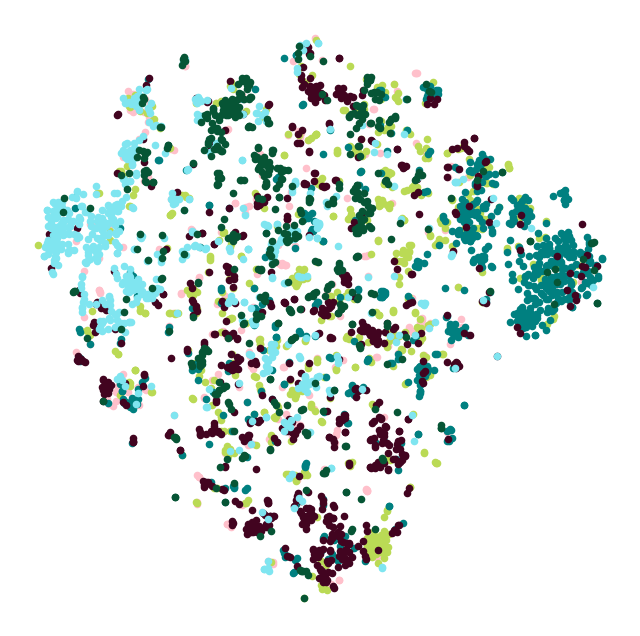

In [26]:
@torch.no_grad()
def plot_points(colors, model):
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    z = TSNE(n_components=2).fit_transform(z.cpu().numpy())
    y = data.y.cpu().numpy()

    plt.figure(figsize=(8, 8))
    for i in range(dataset.num_classes):
        plt.scatter(z[y == i, 0], z[y == i, 1], s=20, color=colors[i])
    plt.axis('off')
    plt.show()

colors = [
    '#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535'
]
plot_points(colors, model_1)

In [27]:
model_2 = Node2Vec(data.edge_index, embedding_dim=64, walk_length=20,
                 context_size=20, walks_per_node=5,
                 num_negative_samples=1, p=200, q=1).to(device)

loader_2 = model_2.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.Adam(list(model_2.parameters()), lr=0.01)

In [28]:
for epoch in range(1, 101):
    loss = train(model_2, loader_2)
    acc = test(model_2)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 01, Loss: 5.9450, Acc: 0.1480


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 02, Loss: 4.9066, Acc: 0.1590


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 03, Loss: 4.2391, Acc: 0.1640


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 04, Loss: 3.7784, Acc: 0.1690


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 05, Loss: 3.4406, Acc: 0.1700


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 06, Loss: 3.1463, Acc: 0.1810


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 07, Loss: 2.8880, Acc: 0.1750


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 08, Loss: 2.6711, Acc: 0.1880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 09, Loss: 2.4779, Acc: 0.2040


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 10, Loss: 2.3142, Acc: 0.2180


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 11, Loss: 2.1671, Acc: 0.2300


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 12, Loss: 2.0295, Acc: 0.2490


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 13, Loss: 1.9130, Acc: 0.2550


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 14, Loss: 1.8029, Acc: 0.2630


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 15, Loss: 1.7037, Acc: 0.2690


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 16, Loss: 1.6187, Acc: 0.2740


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 17, Loss: 1.5366, Acc: 0.2850


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 18, Loss: 1.4716, Acc: 0.3010


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 19, Loss: 1.4044, Acc: 0.3150


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 20, Loss: 1.3463, Acc: 0.3230


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 21, Loss: 1.2957, Acc: 0.3300


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 22, Loss: 1.2508, Acc: 0.3270


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 23, Loss: 1.2157, Acc: 0.3370


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 24, Loss: 1.1749, Acc: 0.3410


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 25, Loss: 1.1370, Acc: 0.3470


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 26, Loss: 1.1096, Acc: 0.3600


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 27, Loss: 1.0838, Acc: 0.3640


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 28, Loss: 1.0603, Acc: 0.3630


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 29, Loss: 1.0393, Acc: 0.3770


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 30, Loss: 1.0202, Acc: 0.3780


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.9956, Acc: 0.3850


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.9831, Acc: 0.3880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.9690, Acc: 0.3950


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.9564, Acc: 0.4040


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.9436, Acc: 0.4090


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.9331, Acc: 0.4090


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.9228, Acc: 0.4060


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.9143, Acc: 0.4130


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.9061, Acc: 0.4120


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8987, Acc: 0.4140


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8918, Acc: 0.4230


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8844, Acc: 0.4320


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8787, Acc: 0.4340


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8748, Acc: 0.4400


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8682, Acc: 0.4370


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8642, Acc: 0.4430


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8593, Acc: 0.4510


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8562, Acc: 0.4470


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8521, Acc: 0.4500


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 50, Loss: 0.8465, Acc: 0.4500


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 51, Loss: 0.8461, Acc: 0.4540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 52, Loss: 0.8431, Acc: 0.4540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 53, Loss: 0.8392, Acc: 0.4640


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 54, Loss: 0.8385, Acc: 0.4620


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 55, Loss: 0.8345, Acc: 0.4670


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 56, Loss: 0.8332, Acc: 0.4780


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 57, Loss: 0.8295, Acc: 0.4820


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 58, Loss: 0.8293, Acc: 0.4870


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 59, Loss: 0.8258, Acc: 0.4840


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 60, Loss: 0.8248, Acc: 0.4880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 61, Loss: 0.8250, Acc: 0.4880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 62, Loss: 0.8218, Acc: 0.4910


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 63, Loss: 0.8194, Acc: 0.4880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 64, Loss: 0.8181, Acc: 0.4800


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 65, Loss: 0.8171, Acc: 0.4870


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 66, Loss: 0.8167, Acc: 0.4930


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 67, Loss: 0.8146, Acc: 0.4980


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 68, Loss: 0.8134, Acc: 0.4890


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 69, Loss: 0.8118, Acc: 0.4960


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 70, Loss: 0.8107, Acc: 0.4910


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 71, Loss: 0.8118, Acc: 0.4850


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 72, Loss: 0.8110, Acc: 0.4770


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 73, Loss: 0.8098, Acc: 0.4880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 74, Loss: 0.8084, Acc: 0.4980


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 75, Loss: 0.8095, Acc: 0.5050


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 76, Loss: 0.8097, Acc: 0.5110


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 77, Loss: 0.8089, Acc: 0.5160


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 78, Loss: 0.8072, Acc: 0.5130


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 79, Loss: 0.8061, Acc: 0.5030


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 80, Loss: 0.8075, Acc: 0.5070


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 81, Loss: 0.8071, Acc: 0.5100


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 82, Loss: 0.8050, Acc: 0.5180


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 83, Loss: 0.8045, Acc: 0.5170


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 84, Loss: 0.8034, Acc: 0.5060


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 85, Loss: 0.8043, Acc: 0.5170


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 86, Loss: 0.8040, Acc: 0.5090


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 87, Loss: 0.8030, Acc: 0.5040


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 88, Loss: 0.8021, Acc: 0.5040


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 89, Loss: 0.8020, Acc: 0.4930


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 90, Loss: 0.8017, Acc: 0.5000


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 91, Loss: 0.8028, Acc: 0.5080


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 92, Loss: 0.8009, Acc: 0.5190


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 93, Loss: 0.8009, Acc: 0.5150


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 94, Loss: 0.8013, Acc: 0.5150


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 95, Loss: 0.8018, Acc: 0.5120


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 96, Loss: 0.8014, Acc: 0.5110


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 97, Loss: 0.8009, Acc: 0.5080


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 98, Loss: 0.8002, Acc: 0.5090


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 99, Loss: 0.7987, Acc: 0.5180


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 100, Loss: 0.7996, Acc: 0.5250


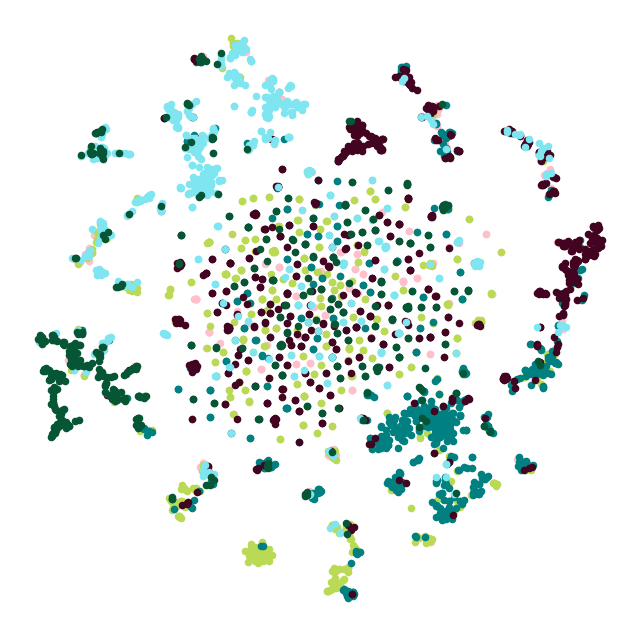

In [29]:
plot_points(colors, model_2)

In [30]:
model_3 = Node2Vec(data.edge_index, embedding_dim=128, walk_length=20,
                 context_size=20, walks_per_node=20,
                 num_negative_samples=1, p=200, q=1).to(device)

loader_3 = model_3.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.Adam(list(model_3.parameters()), lr=0.01)

In [31]:
for epoch in range(1, 101):
    loss = train(model_3, loader_3)
    acc = test(model_3)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 01, Loss: 8.6398, Acc: 0.1830


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 02, Loss: 6.8924, Acc: 0.1890


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 03, Loss: 5.9921, Acc: 0.1910


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 04, Loss: 5.3707, Acc: 0.2020


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 05, Loss: 4.8648, Acc: 0.2070


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 06, Loss: 4.4154, Acc: 0.2170


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 07, Loss: 4.0443, Acc: 0.2320


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 08, Loss: 3.6923, Acc: 0.2440


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 09, Loss: 3.3877, Acc: 0.2560


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 10, Loss: 3.1039, Acc: 0.2670


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 11, Loss: 2.8674, Acc: 0.2790


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 12, Loss: 2.6559, Acc: 0.2880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 13, Loss: 2.4647, Acc: 0.2980


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 14, Loss: 2.2857, Acc: 0.3020


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 15, Loss: 2.1353, Acc: 0.3060


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 16, Loss: 1.9991, Acc: 0.3110


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 17, Loss: 1.8724, Acc: 0.3190


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 18, Loss: 1.7635, Acc: 0.3290


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 19, Loss: 1.6645, Acc: 0.3360


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 20, Loss: 1.5732, Acc: 0.3370


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 21, Loss: 1.4959, Acc: 0.3400


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 22, Loss: 1.4253, Acc: 0.3440


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 23, Loss: 1.3612, Acc: 0.3530


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 24, Loss: 1.3061, Acc: 0.3540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 25, Loss: 1.2569, Acc: 0.3570


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 26, Loss: 1.2114, Acc: 0.3680


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 27, Loss: 1.1726, Acc: 0.3820


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 28, Loss: 1.1371, Acc: 0.3870


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 29, Loss: 1.1069, Acc: 0.3970


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 30, Loss: 1.0766, Acc: 0.4100


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 31, Loss: 1.0524, Acc: 0.4140


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 32, Loss: 1.0292, Acc: 0.4280


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 33, Loss: 1.0113, Acc: 0.4230


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.9927, Acc: 0.4310


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.9757, Acc: 0.4340


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.9616, Acc: 0.4490


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.9463, Acc: 0.4490


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.9341, Acc: 0.4500


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.9234, Acc: 0.4510


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.9131, Acc: 0.4540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.9038, Acc: 0.4560


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8977, Acc: 0.4570


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8874, Acc: 0.4600


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8823, Acc: 0.4590


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8743, Acc: 0.4680


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8687, Acc: 0.4730


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8622, Acc: 0.4880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8583, Acc: 0.4900


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8539, Acc: 0.4890


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 50, Loss: 0.8496, Acc: 0.4890


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 51, Loss: 0.8458, Acc: 0.4860


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 52, Loss: 0.8414, Acc: 0.4870


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 53, Loss: 0.8395, Acc: 0.4830


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 54, Loss: 0.8362, Acc: 0.4910


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 55, Loss: 0.8315, Acc: 0.4900


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 56, Loss: 0.8286, Acc: 0.4900


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 57, Loss: 0.8268, Acc: 0.4970


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 58, Loss: 0.8235, Acc: 0.4960


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 59, Loss: 0.8228, Acc: 0.4950


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 60, Loss: 0.8187, Acc: 0.4870


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 61, Loss: 0.8177, Acc: 0.4960


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 62, Loss: 0.8162, Acc: 0.4900


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 63, Loss: 0.8149, Acc: 0.4880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 64, Loss: 0.8126, Acc: 0.4930


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 65, Loss: 0.8114, Acc: 0.4910


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 66, Loss: 0.8095, Acc: 0.4900


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 67, Loss: 0.8084, Acc: 0.4920


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 68, Loss: 0.8068, Acc: 0.4910


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 69, Loss: 0.8056, Acc: 0.4950


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 70, Loss: 0.8045, Acc: 0.4920


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 71, Loss: 0.8036, Acc: 0.4940


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 72, Loss: 0.8019, Acc: 0.4960


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 73, Loss: 0.8015, Acc: 0.4950


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 74, Loss: 0.8008, Acc: 0.5000


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 75, Loss: 0.7998, Acc: 0.5030


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 76, Loss: 0.8002, Acc: 0.4990


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 77, Loss: 0.7989, Acc: 0.5040


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 78, Loss: 0.7976, Acc: 0.5060


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 79, Loss: 0.7969, Acc: 0.4990


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 80, Loss: 0.7958, Acc: 0.4980


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 81, Loss: 0.7958, Acc: 0.4950


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 82, Loss: 0.7954, Acc: 0.4980


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 83, Loss: 0.7950, Acc: 0.4900


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 84, Loss: 0.7940, Acc: 0.4940


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 85, Loss: 0.7932, Acc: 0.4830


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 86, Loss: 0.7930, Acc: 0.4870


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 87, Loss: 0.7926, Acc: 0.4880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 88, Loss: 0.7917, Acc: 0.4930


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 89, Loss: 0.7916, Acc: 0.4970


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 90, Loss: 0.7910, Acc: 0.4970


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 91, Loss: 0.7907, Acc: 0.4970


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 92, Loss: 0.7903, Acc: 0.4990


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 93, Loss: 0.7907, Acc: 0.4920


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 94, Loss: 0.7901, Acc: 0.4880


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 95, Loss: 0.7890, Acc: 0.4890


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 96, Loss: 0.7899, Acc: 0.4910


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 97, Loss: 0.7890, Acc: 0.4840


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 98, Loss: 0.7889, Acc: 0.4810


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 99, Loss: 0.7888, Acc: 0.4780


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 100, Loss: 0.7874, Acc: 0.4840


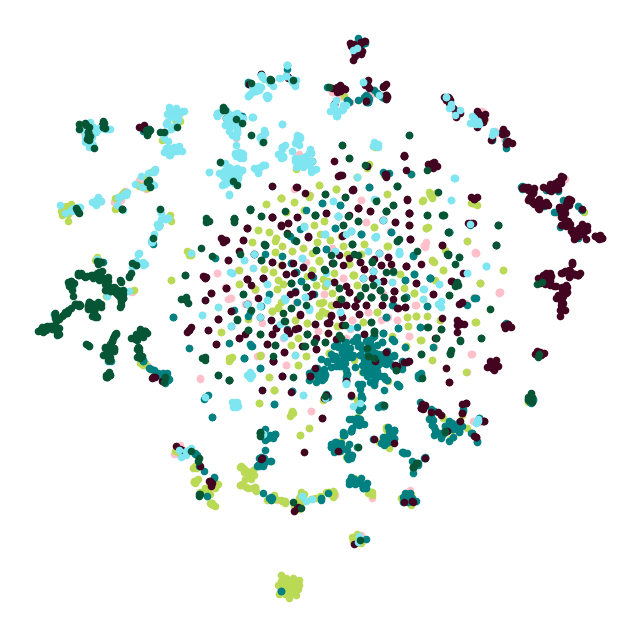

In [32]:
plot_points(colors, model_3)

In [33]:
model_4 = Node2Vec(data.edge_index, embedding_dim=128, walk_length=50,
                 context_size=40, walks_per_node=40,
                 num_negative_samples=1, p=200, q=1).to(device)

loader_4 = model_4.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.Adam(list(model_4.parameters()), lr=0.01)

In [34]:
for epoch in range(1, 101):
    loss = train(model_4, loader_4)
    acc = test(model_4)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 01, Loss: 7.4579, Acc: 0.1790


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 02, Loss: 4.9039, Acc: 0.2380


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 03, Loss: 3.6123, Acc: 0.2640


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 04, Loss: 2.8108, Acc: 0.2940


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 05, Loss: 2.2656, Acc: 0.3230


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 06, Loss: 1.8909, Acc: 0.3340


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 07, Loss: 1.6270, Acc: 0.3500


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.4429, Acc: 0.3680


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.3124, Acc: 0.3910


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.2177, Acc: 0.4160


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.1480, Acc: 0.4350


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 12, Loss: 1.0948, Acc: 0.4530


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 13, Loss: 1.0537, Acc: 0.4610


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 14, Loss: 1.0214, Acc: 0.4750


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.9949, Acc: 0.4890


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.9733, Acc: 0.4900


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.9558, Acc: 0.4990


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.9405, Acc: 0.5050


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.9279, Acc: 0.5090


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.9161, Acc: 0.5140


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.9079, Acc: 0.5230


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.8997, Acc: 0.5240


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.8921, Acc: 0.5300


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.8860, Acc: 0.5300


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.8797, Acc: 0.5350


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.8750, Acc: 0.5390


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.8709, Acc: 0.5420


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.8664, Acc: 0.5380


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.8625, Acc: 0.5450


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.8592, Acc: 0.5440


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.8561, Acc: 0.5480


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.8533, Acc: 0.5440


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.8508, Acc: 0.5380


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.8482, Acc: 0.5540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.8459, Acc: 0.5580


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.8440, Acc: 0.5580


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.8424, Acc: 0.5560


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.8402, Acc: 0.5550


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.8387, Acc: 0.5540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8370, Acc: 0.5570


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8354, Acc: 0.5610


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8343, Acc: 0.5610


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8326, Acc: 0.5580


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8317, Acc: 0.5630


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8303, Acc: 0.5580


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8289, Acc: 0.5600


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8284, Acc: 0.5540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8274, Acc: 0.5520


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8263, Acc: 0.5640


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 50, Loss: 0.8255, Acc: 0.5490


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 51, Loss: 0.8249, Acc: 0.5560


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 52, Loss: 0.8244, Acc: 0.5650


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 53, Loss: 0.8231, Acc: 0.5640


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 54, Loss: 0.8225, Acc: 0.5580


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 55, Loss: 0.8214, Acc: 0.5590


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 56, Loss: 0.8212, Acc: 0.5570


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 57, Loss: 0.8203, Acc: 0.5570


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 58, Loss: 0.8196, Acc: 0.5550


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 59, Loss: 0.8193, Acc: 0.5630


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 60, Loss: 0.8190, Acc: 0.5540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 61, Loss: 0.8183, Acc: 0.5680


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 62, Loss: 0.8174, Acc: 0.5550


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 63, Loss: 0.8172, Acc: 0.5450


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 64, Loss: 0.8167, Acc: 0.5520


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 65, Loss: 0.8163, Acc: 0.5520


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 66, Loss: 0.8158, Acc: 0.5540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 67, Loss: 0.8155, Acc: 0.5540


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 68, Loss: 0.8156, Acc: 0.5490


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 69, Loss: 0.8149, Acc: 0.5430


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 70, Loss: 0.8143, Acc: 0.5510


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 71, Loss: 0.8140, Acc: 0.5570


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 72, Loss: 0.8135, Acc: 0.5530


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 73, Loss: 0.8131, Acc: 0.5470


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 74, Loss: 0.8128, Acc: 0.5460


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 75, Loss: 0.8128, Acc: 0.5480


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 76, Loss: 0.8123, Acc: 0.5500


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 77, Loss: 0.8117, Acc: 0.5590


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 78, Loss: 0.8119, Acc: 0.5500


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 79, Loss: 0.8116, Acc: 0.5530


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 80, Loss: 0.8111, Acc: 0.5530


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 81, Loss: 0.8111, Acc: 0.5460


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 82, Loss: 0.8111, Acc: 0.5510


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 83, Loss: 0.8104, Acc: 0.5430


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 84, Loss: 0.8101, Acc: 0.5500


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 85, Loss: 0.8096, Acc: 0.5510


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 86, Loss: 0.8101, Acc: 0.5440


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 87, Loss: 0.8097, Acc: 0.5450


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 88, Loss: 0.8094, Acc: 0.5470


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 89, Loss: 0.8092, Acc: 0.5590


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 90, Loss: 0.8090, Acc: 0.5450


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 91, Loss: 0.8087, Acc: 0.5370


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 92, Loss: 0.8087, Acc: 0.5380


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 93, Loss: 0.8079, Acc: 0.5390


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 94, Loss: 0.8083, Acc: 0.5410


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 95, Loss: 0.8080, Acc: 0.5420


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 96, Loss: 0.8079, Acc: 0.5370


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 97, Loss: 0.8073, Acc: 0.5480


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 98, Loss: 0.8076, Acc: 0.5430


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 99, Loss: 0.8073, Acc: 0.5440


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch: 100, Loss: 0.8073, Acc: 0.5420


**Results**

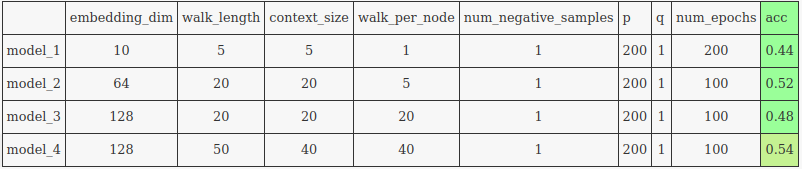